1 0
0 0
200 150.0
200 150.0 300 150
0 0
Line accepted from 200.00, 150.00 to 300.00, 150.00


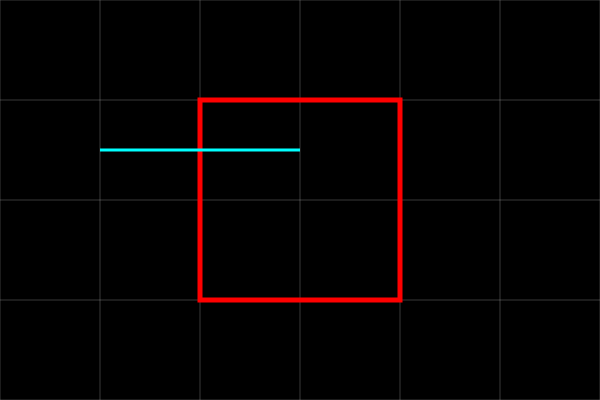

In [2]:
import cairo
from IPython.display import SVG, display

surface_size_x = 600; surface_size_y = 400; pixel_width = 100

def drawGrid(size_x, size_y, pixel_size, ct):
    for i in range(int(size_x / pixel_size)):
        for j in range(int(size_y / pixel_size)):
            ct.rectangle(i*pixel_size, j*pixel_size, pixel_size, pixel_size)
    ct.stroke()

def drawLine(x1, y1, x2, y2):
	ctx.move_to(x1, y1)
	ctx.line_to(x2, y2)
	ctx.set_line_width(3)
	ctx.stroke()

def computeCode(x, y, x_min, y_min, x_max, y_max):
	code = INSIDE
	if x < x_min: # to the left of rectangle
		code |= LEFT
	elif x > x_max: # to the right of rectangle
		code |= RIGHT
	if y < y_min: # below the rectangle
		code |= BOTTOM
	elif y > y_max: # above the rectangle
		code |= TOP
	return code

def cohenSutherlandClip(x1, y1, x2, y2, x_min, y_min, x_max, y_max):
	drawLine(x1, y1, x2, y2)
	ctx.stroke()
	code1 = computeCode(x1, y1, x_min, y_min, x_max, y_max)
	code2 = computeCode(x2, y2, x_min, y_min, x_max, y_max)
	accept = False

	while True:
		print(code1, code2)
		if code1 == 0 and code2 == 0: # If both endpoints lie within rectangle
			accept = True
			break
		elif (code1 & code2) != 0: # If both endpoints are outside rectangle
			break
		else: # Some segment lies within the rectangle
			x = 1.0
			y = 1.0
			if code1 != 0:
				code_out = code1
			else:
				code_out = code2

			if code_out & TOP: # Point is above the clip rectangle
				x = x1 + (x2 - x1) * (y_max - y1) / (y2 - y1)
				y = y_max
			elif code_out & BOTTOM: # Point is below the clip rectangle
				x = x1 + (x2 - x1) * (y_min - y1) / (y2 - y1)
				y = y_min
			elif code_out & RIGHT: # Point is to the right of the clip rectangle
				y = y1 + (y2 - y1) * (x_max - x1) / (x2 - x1)
				x = x_max
			elif code_out & LEFT: # Point is to the left of the clip rectangle
				y = y1 + (y2 - y1) * (x_min - x1) / (x2 - x1)
				x = x_min

			if code_out == code1:
				x1 = x
				y1 = y
				code1 = computeCode(x1, y1, x_min, y_min, x_max, y_max)
			else:
				x2 = x
				y2 = y
				code2 = computeCode(x2, y2, x_min, y_min, x_max, y_max)
				
			print(code1, code2)
			print(x, y)
			print(x1, y1, x2, y2)

	if accept:
		print("Line accepted from %.2f, %.2f to %.2f, %.2f" % (x1, y1, x2, y2))
	else:
		print(x1, y1, x2, y2, "Line rejected")

with cairo.SVGSurface("example.svg", surface_size_x, surface_size_y) as surface:
	cairo.ImageSurface(cairo.FORMAT_RGB24, surface_size_x, surface_size_y)
	ctx = cairo.Context(surface)
	ctx.set_source_rgb(0.0, 0.0, 0.0)
	ctx.paint()
	ctx.set_source_rgba(1.0, 1.0, 1.0)
	ctx.set_line_width(0.22)
	drawGrid(surface_size_x, surface_size_y, pixel_width, ctx)

	INSIDE = 0 # 0000
	LEFT = 1 # 0001
	RIGHT = 2 # 0010
	BOTTOM = 4 # 0100
	TOP = 8 # 1000

	x_min = 200; y_min = 100
	x_max = 400; y_max = 300
 
	ctx.rectangle(x_min, y_min, x_max-x_min, y_max-y_min)
	ctx.set_source_rgb(1, 0, 0)
	ctx.set_line_width(5)
	ctx.stroke()

	# ctx.set_source_rgb(1, 0, 1) # Pink
	# x1 = 100; y1 = 50; x2 = 500; y2 = 50
	# cohenSutherlandClip(x1, y1, x2, y2, x_min, y_min, x_max, y_max)

	ctx.set_source_rgb(0, 1, 1) # Cyan
	x1 = 100; y1 = 150; x2 = 300; y2 = 150
	cohenSutherlandClip(x1, y1, x2, y2, x_min, y_min, x_max, y_max)

	# ctx.set_source_rgb(0, 1, 0) # Green
	# x1 = 100; y1 = 200; x2 = 500; y2 = 200
	# cohenSutherlandClip(x1, y1, x2, y2, x_min, y_min, x_max, y_max)

	# ctx.set_source_rgb(1, 1, 0) # Yellow
	# x1 = 200; y1 = 250; x2 = 400; y2 = 250
	# cohenSutherlandClip(x1, y1, x2, y2, x_min, y_min, x_max, y_max)

	surface.write_to_png('rectangle.png')
display(SVG(filename="example.svg"))

# Marvin Adinata
# 312110009D

200 0
[-200, 200, 0, 0]
[-100, 300, 50, 150]
0.5 1 0.5
0.5 1 1.5
0.5 1 1.5
0.5 1 1.5
Clipped Line Segment:
(200.0, 150.0) to (300, 150)


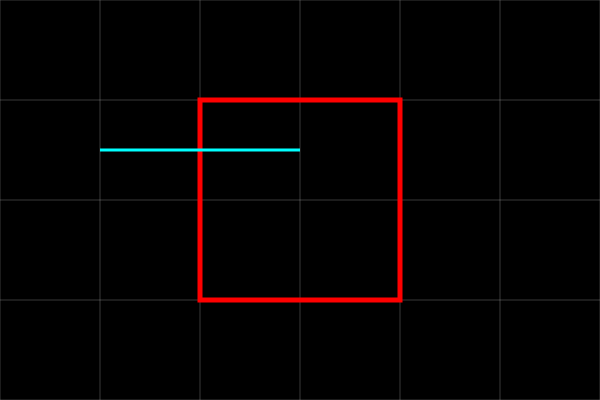

In [7]:
import cairo
from IPython.display import SVG, display

surface_size_x = 600; surface_size_y = 400; pixel_width = 100

def drawGrid(size_x, size_y, pixel_size, ct):
    for i in range(int(size_x / pixel_size)):
        for j in range(int(size_y / pixel_size)):
            ct.rectangle(i*pixel_size, j*pixel_size, pixel_size, pixel_size)
    ct.stroke()

def drawLine(x1, y1, x2, y2):
	ctx.move_to(x1, y1)
	ctx.line_to(x2, y2)
	ctx.set_line_width(3)
	ctx.stroke()

def liangBarskyClipping(x1, y1, x2, y2, xmin, ymin, xmax, ymax):
	drawLine(x1, y1, x2, y2)
	ctx.stroke()
	dx = x2 - x1
	dy = y2 - y1

	p = [(-dx), dx, (-dy), dy]
	q = [x1 - xmin, xmax - x1, y1 - ymin, ymax - y1]

	t1 = 0
	t2 = 1
	print(dx, dy)
	print(p)
	print(q)
	for i in range(4):
		if p[i] == 0 and q[i] < 0:
			print("Line rejected just", p[i], q[i], "apart")
			return None
		elif p[i] != 0:
			r = q[i] / p[i]
			if p[i] < 0:
				t1 = max(t1, r)
			else:
				t2 = min(t2, r)
		print(t1, t2, r)
		
	if t1 > t2:
		return None

	x1_clip = x1 + t1 * dx
	y1_clip = y1 + t1 * dy
	x2_clip = x1 + t2 * dx
	y2_clip = y1 + t2 * dy

	print("Clipped Line Segment:")
	print(f"({x1_clip}, {y1_clip}) to ({x2_clip}, {y2_clip})")

	return x1_clip, y1_clip, x2_clip, y2_clip

with cairo.SVGSurface("example.svg", surface_size_x, surface_size_y) as surface:
	cairo.ImageSurface(cairo.FORMAT_RGB24, surface_size_x, surface_size_y)
	ctx = cairo.Context(surface)
	ctx.set_source_rgb(0.0, 0.0, 0.0)
	ctx.paint()
	ctx.set_source_rgba(1.0, 1.0, 1.0)
	ctx.set_line_width(0.22)
	drawGrid(surface_size_x, surface_size_y, pixel_width, ctx)

	x_min = 200; y_min = 100
	x_max = 400; y_max = 300
 
	ctx.rectangle(x_min, y_min, x_max-x_min, y_max-y_min)
	ctx.set_source_rgb(1, 0, 0)
	ctx.set_line_width(5)
	ctx.stroke()

	# ctx.set_source_rgb(1, 0, 1) # Pink
	# x1 = 100; y1 = 50; x2 = 500; y2 = 50
	# liangBarskyClipping(x1, y1, x2, y2, x_min, y_min, x_max, y_max)

	ctx.set_source_rgb(0, 1, 1) # Cyan
	x1 = 100; y1 = 150; x2 = 300; y2 = 150
	liangBarskyClipping(x1, y1, x2, y2, x_min, y_min, x_max, y_max)

	# ctx.set_source_rgb(0, 1, 0) # Green
	# x1 = 100; y1 = 200; x2 = 500; y2 = 200
	# liangBarskyClipping(x1, y1, x2, y2, x_min, y_min, x_max, y_max)

	# ctx.set_source_rgb(1, 1, 0) # Yellow
	# x1 = 200; y1 = 250; x2 = 400; y2 = 250
	# liangBarskyClipping(x1, y1, x2, y2, x_min, y_min, x_max, y_max)

	surface.write_to_png('rectangle.png')
display(SVG(filename="example.svg"))

# Marvin Adinata
# 312110009

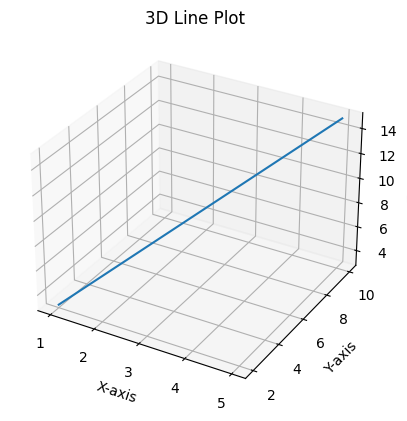

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# X, Y, and Z coordinates of the line
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]
z = [3, 6, 9, 12, 15]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the line
ax.plot3D(x, y, z)

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Line Plot')

# Display the plot
plt.show()